In [725]:
 # import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import pandas.api.types as  ptypes
import seaborn as sb
import sklearn
from sklearn import preprocessing
import pickle
import warnings
import csv
warnings.filterwarnings('ignore')

In [726]:
# import dataset
dataset =  pd.read_csv('/home/admin1/PycharmProjects/Basic Python/myprograms/WEEK_9/simple linear regression/Data/bike_sharing.csv')

In [727]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [728]:
dataset.shape

(17379, 17)

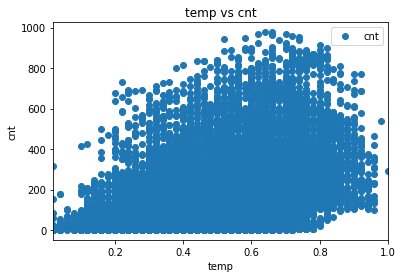

In [729]:
# ploting temp vs cnt
dataset.plot(x='temp', y='cnt', style='o')  
plt.title('temp vs cnt')  
plt.xlabel('temp')  
plt.ylabel('cnt')  
plt.show()

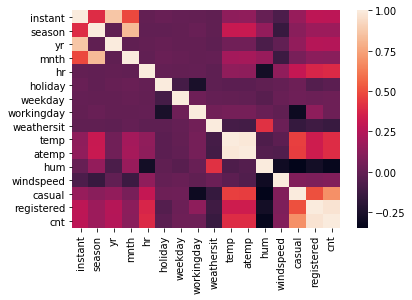

In [730]:
# correlation between columns
corr = dataset.corr()
sb.heatmap(corr)

In [731]:
# droping column that has negetive or no relationship together
dataset = dataset.drop(columns=['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 
                                'weekday','workingday', 'weathersit','atemp', 'hum', 'windspeed', 
                                'casual','registered'], axis=1)
dataset.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [732]:
dataset.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [733]:
# calculating  sum of null values
dataset.isna().sum()

temp    0
cnt     0
dtype: int64

In [734]:
dataset.duplicated().sum()

7544

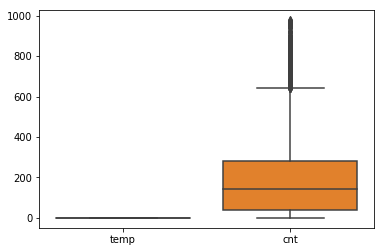

In [735]:
# boxplot to  find outliers of datatset
sb.boxplot(data = dataset)

Skewness is -0.2794706917752847


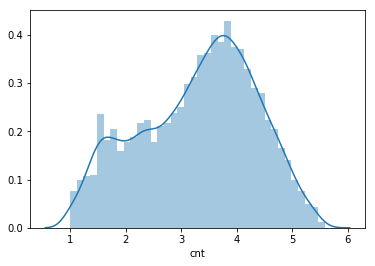

In [736]:
# ckecking skewness of dataset
dataset.cnt = (np.sqrt(np.sqrt(dataset.cnt)))
print ('Skewness is', dataset.cnt.skew())
sb.distplot(dataset.cnt)

In [737]:
#  handle missing values
dataset.replace(np.NaN,dataset.mean(),inplace=True)

In [738]:
# scaling dataset by standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

In [739]:
# convert dataset into dataframe
dataset = pd.DataFrame(dataset)

In [740]:
# # divide data in train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(dataset,test_size = 0.10)

In [741]:
# save test data into csv file
x_test.to_csv('test.csv',index=False)

In [742]:
# save train data into csv file 
x_train.to_csv('train.csv',index=False)

In [743]:
# reading train csv file
train_data = pd.read_csv('train.csv')

In [744]:
train_data.describe()

,0,1
count,15641.000000,15641.000000
mean,0.003581,-0.000259
std,0.999950,0.999403
min,-2.477205,-2.202143
25%,-0.815304,-0.754645
50%,0.015647,0.140823
75%,0.846597,0.754521
max,2.612367,2.184494


In [745]:
train_data.rename(columns={'0':'temp','1':'cnt'}, inplace=True)
train_data.head()

,temp,cnt
0,0.638860,-0.042276
1,0.015647,0.822349
2,1.054335,-0.049191
3,-0.815304,0.555349
4,0.742729,0.701233


In [746]:
# split train data into training data and testing data
from sklearn.model_selection import train_test_split
x_train_data,cross_valid = train_test_split(train_data,test_size = 1/3)
# x_train_data.shape

In [747]:
x_train_data.shape

(10427, 2)

In [748]:
cross_valid.shape

(5214, 2)

In [749]:
# save cross validation data to csv file
cross_valid.to_csv('cross_validate.csv',index=False)

In [750]:
x_train_data.head()

,temp,cnt
14094,-0.088222,0.575540
3132,0.846597,1.665191
7509,-0.192091,0.453526
9994,0.223385,0.208404
9805,1.365942,0.890022


In [751]:
# split x_train_data into x and y  
x = x_train_data.iloc[:,:-1].values
y = x_train_data.iloc[:,1].values

In [752]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [753]:
regressor.score(x,y)

0.16646457253065772

In [754]:
y_pred_train =  regressor.predict(x)
print(y_pred_train)

[-0.03968108  0.34147936 -0.08203224 ...  0.55323516  0.46853284
 -0.37849036]


In [755]:
# split  cross validate data into x_cv and y_cv
x_cv = cross_valid.iloc[:,:-1].values
y_cv = cross_valid.iloc[:,1].values

In [756]:
# predicting the test set result
y_pred_test = regressor.predict(x_cv)

In [757]:
# display y_predict value 
print(y_pred_test)

[ 0.42618168  0.21442588 -0.67494848 ... -0.37849036  0.34147936
  0.0873724 ]


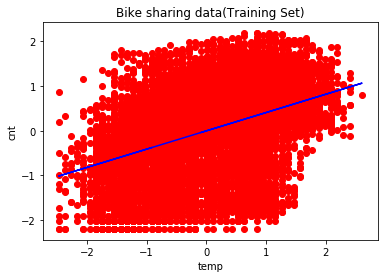

In [758]:
# visualizing the training set result
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Bike sharing data(Training Set)')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

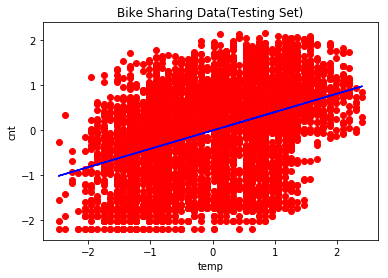

In [759]:
# visualizing the testing set result
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_cv,regressor.predict(x_cv),color='blue')
plt.title('Bike Sharing Data(Testing Set)')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

In [760]:
# calculating accuracy using r2_score
train_accuracy = sklearn.metrics.r2_score(y,y_pred_train)
train_accuracy = (1-train_accuracy)*100
print("Accuracy of train data =",train_accuracy)

test_accuraccy = sklearn.metrics.r2_score(y_cv,y_pred_test)
test_accuraccy=(1-test_accuraccy) *100
print("Accuracy of test data =",  test_accuraccy)

Accuracy of train data = 83.35354274693422
Accuracy of test data = 83.37312309482647


In [761]:
# create model with pickle file
file = open('training.pkl', 'wb')
pickle.dump(regressor,file)
file.close()